In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

product_category_2 and 3 are having null values 

In [4]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [11]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Analyzing columns :

In [15]:
df["User_ID"].nunique()

5891

In [18]:
df["Product_ID"].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [19]:
len(df["Product_ID"].unique())

3631

In [20]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [21]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [23]:
df["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [25]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [26]:
df["Stay_In_Current_City_Years"].unique()	

array(['2', '4+', '3', '1', '0'], dtype=object)

In [28]:
df["Marital_Status"].unique()

array([0, 1], dtype=int64)

In [29]:
df["Purchase"].sum()

5095812742

# Analyzing Gender

In [31]:
df[df['Gender']=='M']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


In [32]:
df[df['Gender']=='F']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
...,...,...,...,...,...,...,...,...,...,...
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [38]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [39]:
df[df['Gender']=="M"]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


In [77]:
df[df['Gender']=="F"].sort_values(by='Product_Category_1')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
265261,1004834,P00110842,F,46-50,9,C,1,1,1,15766
543880,1005744,P00036842,F,26-35,4,A,2,0,1,15481
291889,1003023,P00125942,F,26-35,7,C,4+,1,1,11768
291890,1003023,P00347642,F,26-35,7,C,4+,1,1,8293
86773,1001383,P00267542,F,26-35,7,A,1,0,1,11923
...,...,...,...,...,...,...,...,...,...,...
548158,1003308,P00371644,F,18-25,20,B,3,1,20,119
548163,1003319,P00375436,F,55+,13,B,1,1,20,475
548164,1003322,P00375436,F,18-25,4,B,2,0,20,613
548169,1003331,P00371644,F,26-35,7,B,3,0,20,369


In [52]:
data=pd.DataFrame({'Ratio':[len(df["Gender"]=='M'),len(df["Gender"]=='f')]},index=['Male','Female'])

In [53]:
data

,Ratio
Male,550068
Female,550068


<AxesSubplot:xlabel='Gender'>

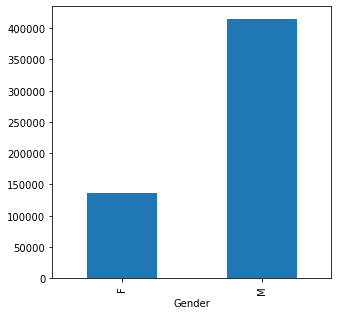

In [58]:
df.groupby("Gender").size().plot(kind='bar',figsize=(5,5))

Text(0.5, 1.0, 'percentage of people in the dataset')

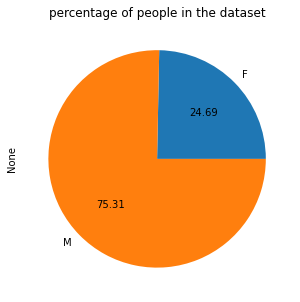

In [98]:
df.groupby("Gender").size().plot(kind='pie',autopct="%.2f",figsize=(5,5))
plt.title("percentage of people in the dataset")

Text(0.5, 1.0, 'Amount puchased by males and females')

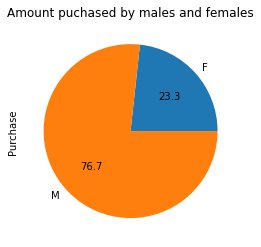

In [96]:
df.groupby("Gender").sum()["Purchase"].plot(kind='pie',autopct="%0.1f")
plt.title("Amount puchased by males and females")

Text(0.5, 1.0, 'mean amount puchased by gender')

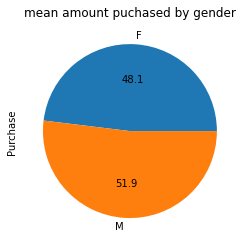

In [95]:
df.groupby("Gender").mean()["Purchase"].plot(kind='pie',autopct="%0.1f")
plt.title("mean amount puchased by gender")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Analyzing City Category :

In [121]:
df=pd.read_csv("train.csv")

In [47]:
df.head()
del df["Product_Category_2"]
del df["Product_Category_3"]

In [6]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


In [8]:
df["City_Category"].unique() 

array(['A', 'C', 'B'], dtype=object)

In [11]:
df["City_Category"].nunique()

3

In [33]:
df=df[df["City_Category"]=="A"]

In [35]:
df.count()

User_ID                       147720
Product_ID                    147720
Gender                        147720
Age                           147720
Occupation                    147720
City_Category                 147720
Stay_In_Current_City_Years    147720
Marital_Status                147720
Product_Category_1            147720
Purchase                      147720
dtype: int64

In [43]:
data=df[df["City_Category"]=="B"]

In [52]:
data.count()

User_ID                       231173
Product_ID                    231173
Gender                        231173
Age                           231173
Occupation                    231173
City_Category                 231173
Stay_In_Current_City_Years    231173
Marital_Status                231173
Product_Category_1            231173
Purchase                      231173
dtype: int64

In [48]:
data1=df[df["City_Category"]=="C"]

In [50]:
data1.count()

User_ID                       171175
Product_ID                    171175
Gender                        171175
Age                           171175
Occupation                    171175
City_Category                 171175
Stay_In_Current_City_Years    171175
Marital_Status                171175
Product_Category_1            171175
Purchase                      171175
dtype: int64

In [79]:
x=pd.crosstab(df["City_Category"],"No of count")
x

col_0,No of count
City_Category,
A,147720
B,231173
C,171175


df.groupby("City_Category").size().plot(kind='bar',figsize=(5,5))

In [84]:
data2=df.values

In [85]:
c=0
for i in data2:
    if i[0]==1000001 and i[5]=='A':
        c=c+1

In [86]:
print(c)

35


# Analyzing Age and Martial status:

<AxesSubplot:xlabel='Age'>

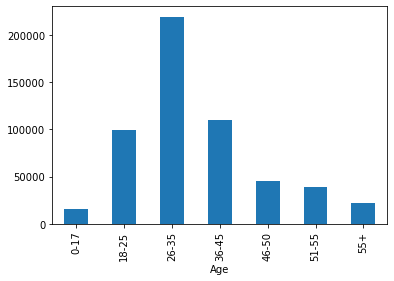

In [91]:
df.groupby('Age').size().plot(kind='bar')

In [92]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [101]:
lst=[]
for i in df["Age"].unique():
    lst.append([i,len(df[df["Age"]==i])])
lst

[['0-17', 15102],
 ['55+', 21504],
 ['26-35', 219587],
 ['46-50', 45701],
 ['51-55', 38501],
 ['36-45', 110013],
 ['18-25', 99660]]

In [102]:
d=pd.DataFrame(lst,columns=["age","product"])

In [103]:
d

,age,product
0,0-17,15102
1,55+,21504
2,26-35,219587
3,46-50,45701
4,51-55,38501
5,36-45,110013
6,18-25,99660


In [105]:
df

In [126]:
p=[]
for i in df["Age"].unique():
    p.append([i,len(df[df["Age"]==i]['Product_ID'].unique())])
p=pd.DataFrame(p,columns=["age","uniqueprodid"])

,age,uniqueprodid
0,0-17,2323
1,55+,2584
2,26-35,3427
3,46-50,3106
4,51-55,2887
5,36-45,3328
6,18-25,3220


<AxesSubplot:xlabel='Age'>

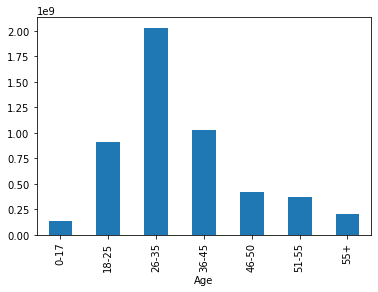

In [134]:
df.groupby('Age').sum()["Purchase"].plot(kind="bar")

<AxesSubplot:ylabel='Purchase'>

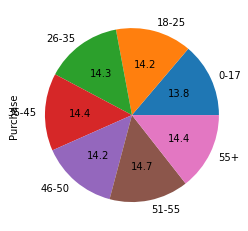

In [137]:
df.groupby('Age').mean()["Purchase"].plot(kind="pie",autopct="%.1f")

<AxesSubplot:ylabel='Purchase'>

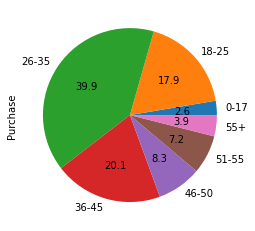

In [138]:
df.groupby('Age').sum()["Purchase"].plot(kind="pie",autopct="%.1f")

<AxesSubplot:xlabel='Marital_Status'>

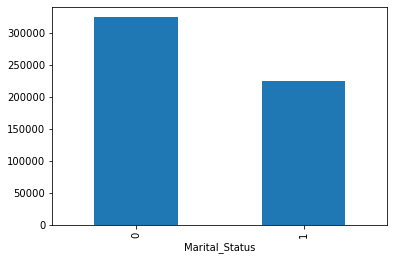

In [144]:
df.groupby("Marital_Status").size().plot(kind="bar")

<AxesSubplot:ylabel='None'>

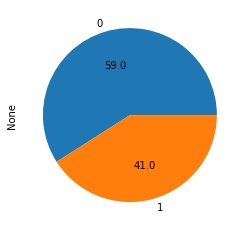

In [149]:
df.groupby("Marital_Status").size().plot(kind="pie",autopct="%.1f")

<AxesSubplot:ylabel='Purchase'>

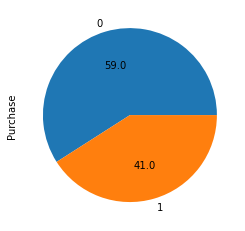

In [150]:
df.groupby("Marital_Status").sum()["Purchase"].plot(kind="pie",autopct="%.1f")

In [151]:
df.groupby("Marital_Status").sum()["Purchase"]

Marital_Status
0    3008927447
1    2086885295
Name: Purchase, dtype: int64

# Analyzing multiple columns:

In [152]:
df=pd.read_csv("train.csv")
del df["Product_Category_2"]
del df["Product_Category_3"]


In [154]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


<AxesSubplot:xlabel='Age', ylabel='count'>

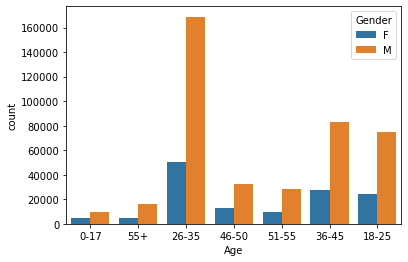

In [6]:

sns.countplot(x="Age",hue="Gender",data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

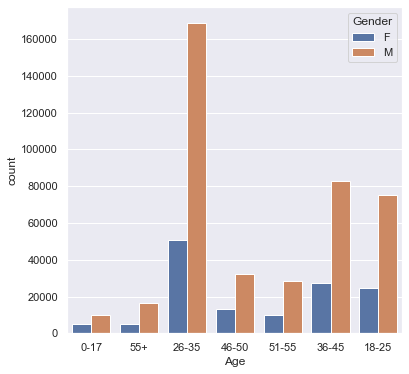

In [12]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x="Age",hue="Gender",data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

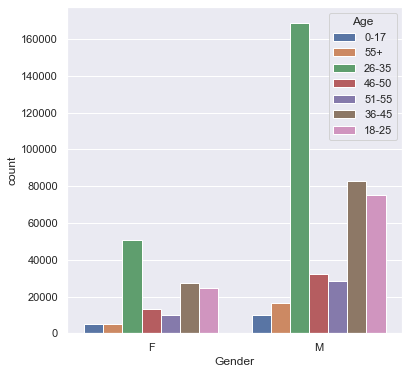

In [13]:
sns.countplot(x="Gender",hue="Age",data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

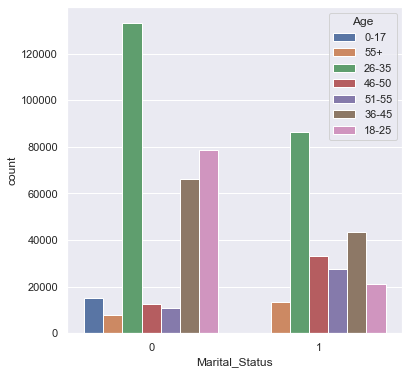

In [28]:
sns.countplot(x="Marital_Status",hue="Age",data=df)


<AxesSubplot:xlabel='City_Category', ylabel='count'>

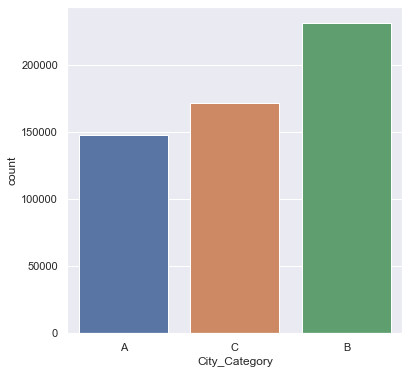

In [31]:
sns.countplot(x=df["City_Category"])


<AxesSubplot:xlabel='City_Category', ylabel='count'>

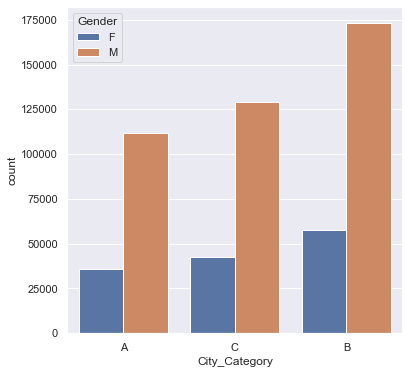

In [19]:
sns.countplot(x="City_Category",hue="Gender",data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

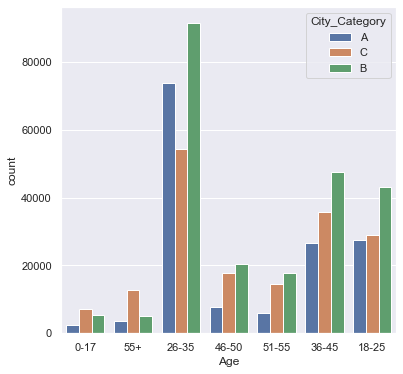

In [20]:
sns.countplot(x="Age",hue="City_Category",data=df)

<AxesSubplot:ylabel='None'>

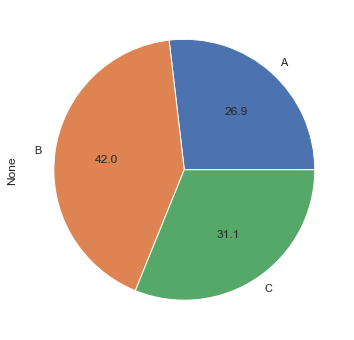

In [32]:
df.groupby("City_Category").size().plot(kind="pie",autopct="%.1f")

# Occupation and Product analysis :

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

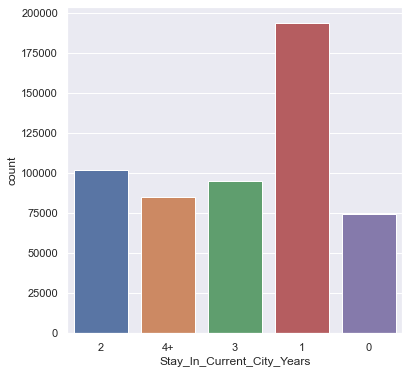

In [33]:
sns.countplot(x=df["Stay_In_Current_City_Years"])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

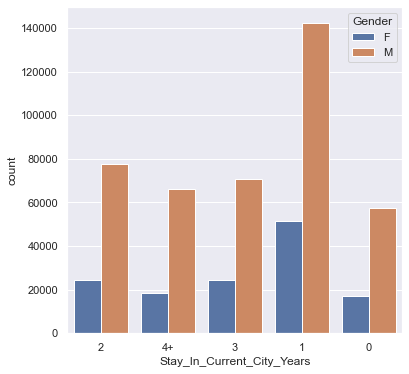

In [35]:
sns.countplot(x="Stay_In_Current_City_Years",hue="Gender",data=df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

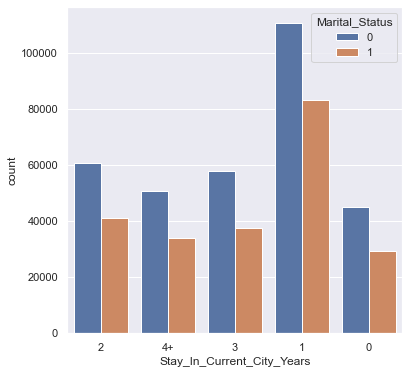

In [36]:
sns.countplot(x="Stay_In_Current_City_Years",hue="Marital_Status",data=df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

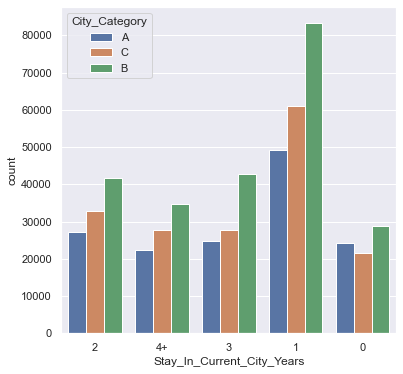

In [37]:
sns.countplot(x="Stay_In_Current_City_Years",hue="City_Category",data=df)

<AxesSubplot:ylabel='None'>

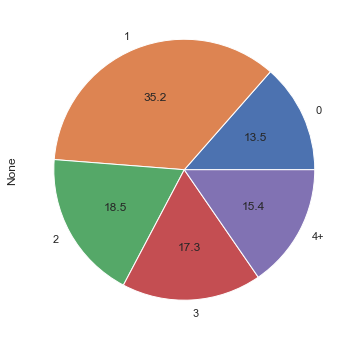

In [41]:
df.groupby("Stay_In_Current_City_Years").size().plot(kind="pie",autopct="%.1f")

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

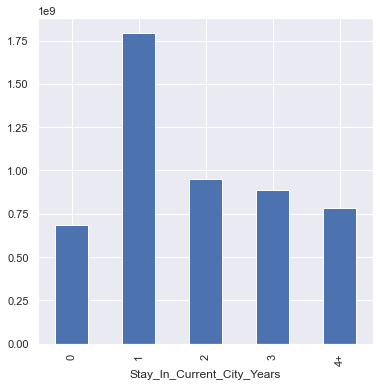

In [46]:
df.groupby("Stay_In_Current_City_Years").sum()["Purchase"].plot(kind="bar")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

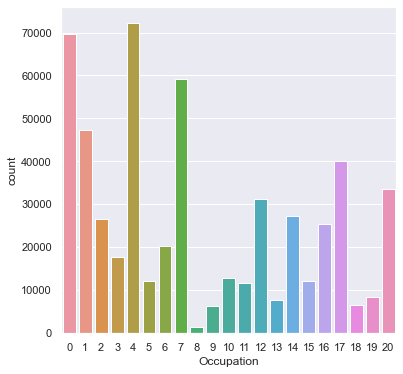

In [47]:
sns.countplot(x=df["Occupation"])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

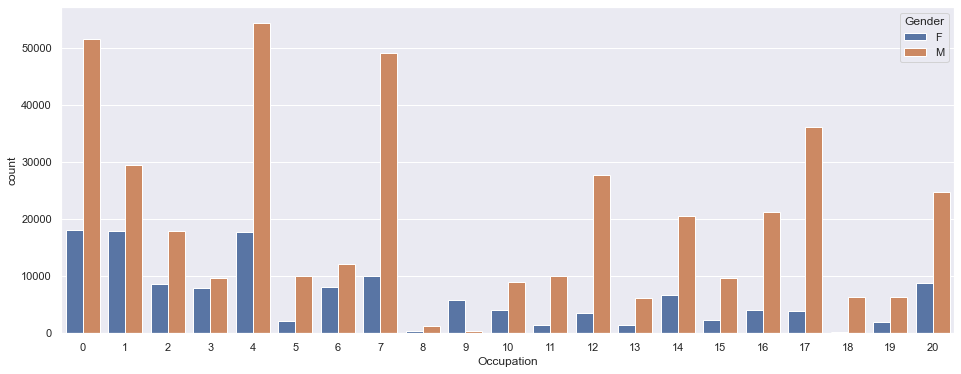

In [53]:
sns.set(rc={'figure.figsize':(16,6)})
sns.countplot(x="Occupation",hue="Gender",data=df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

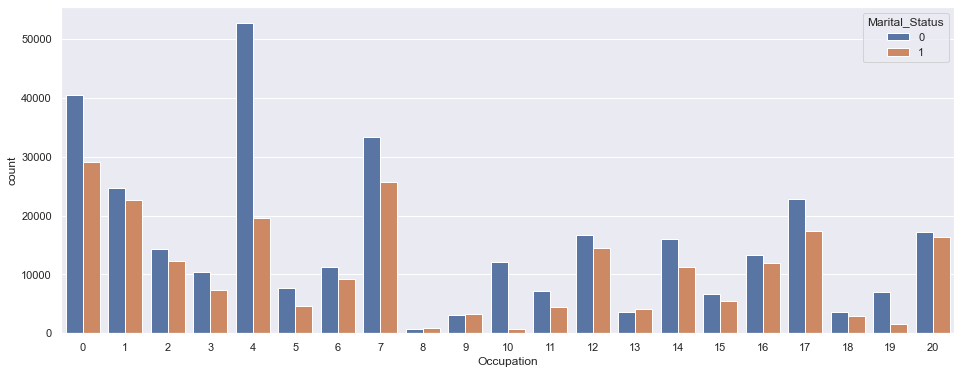

In [54]:
sns.countplot(x="Occupation",hue="Marital_Status",data=df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

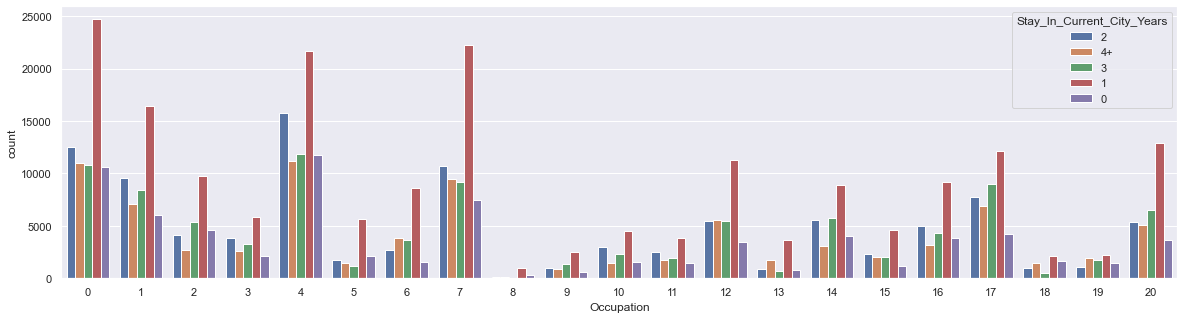

In [58]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x="Occupation",hue="Stay_In_Current_City_Years",data=df)

<AxesSubplot:xlabel='Occupation'>

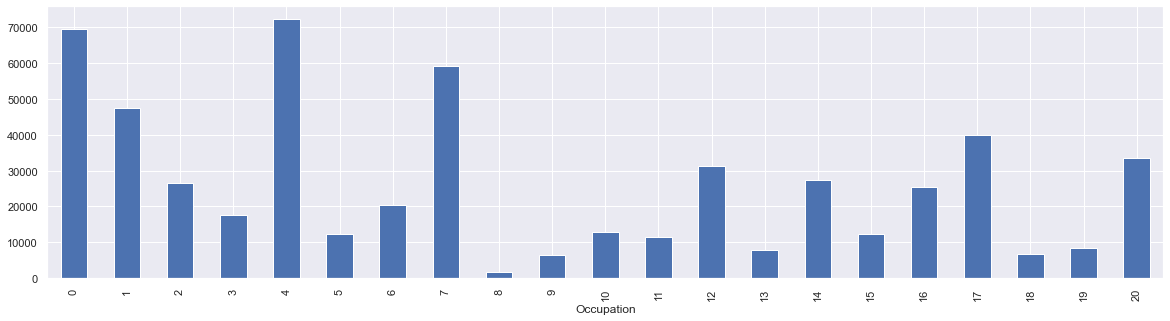

In [63]:
df.groupby("Occupation").size().plot(kind='bar')

<AxesSubplot:xlabel='Occupation'>

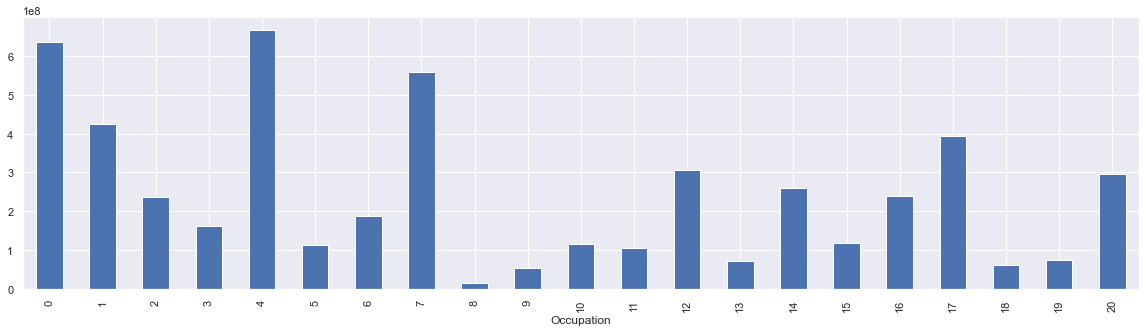

In [64]:
df.groupby("Occupation").sum()['Purchase'].plot(kind='bar')

<AxesSubplot:xlabel='Occupation'>

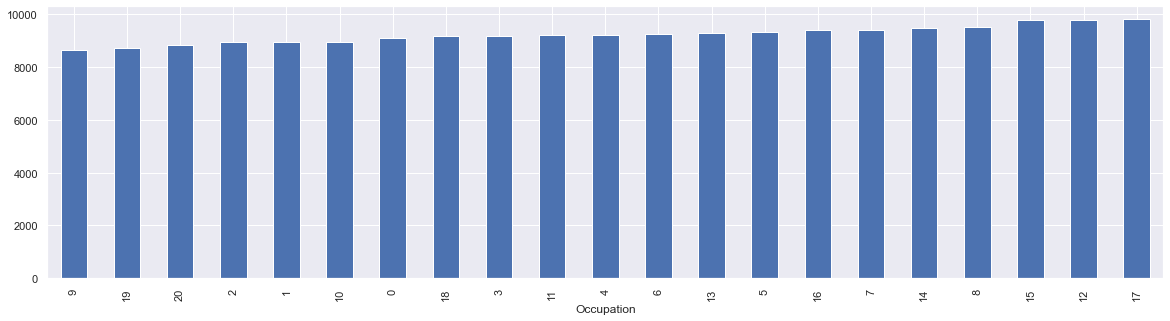

In [75]:
df.groupby("Occupation").mean()['Purchase'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Occupation'>

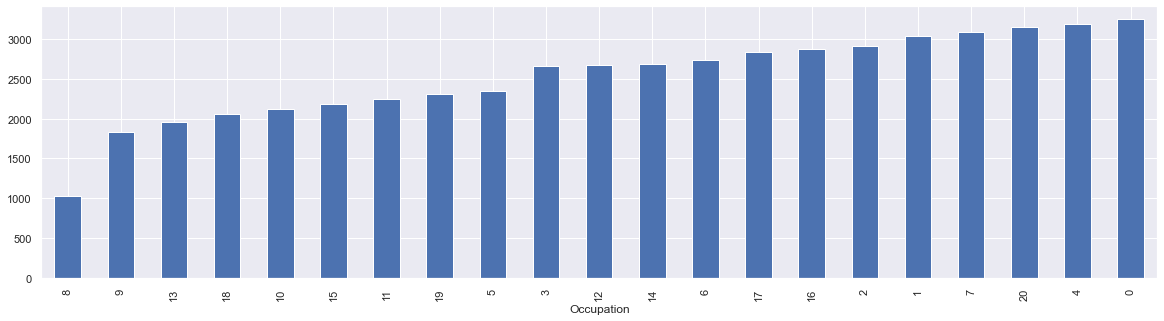

In [77]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind="bar")

<AxesSubplot:xlabel='Product_Category_1'>

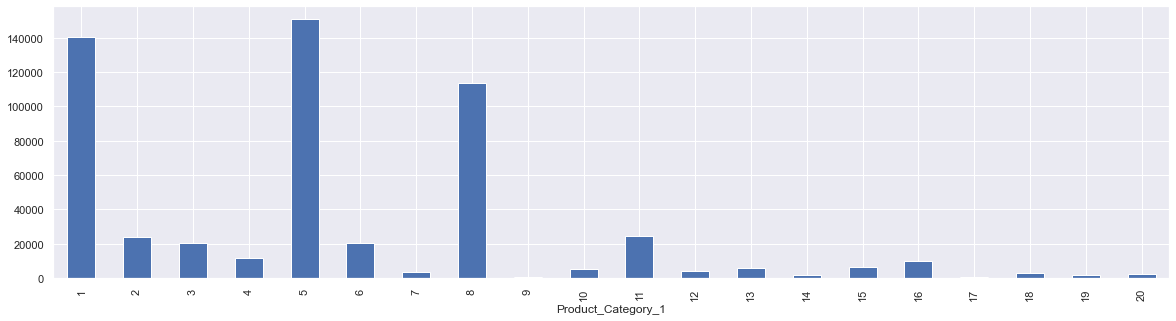

In [78]:
df.groupby('Product_Category_1').size().plot(kind='bar')

<AxesSubplot:xlabel='Product_Category_1'>

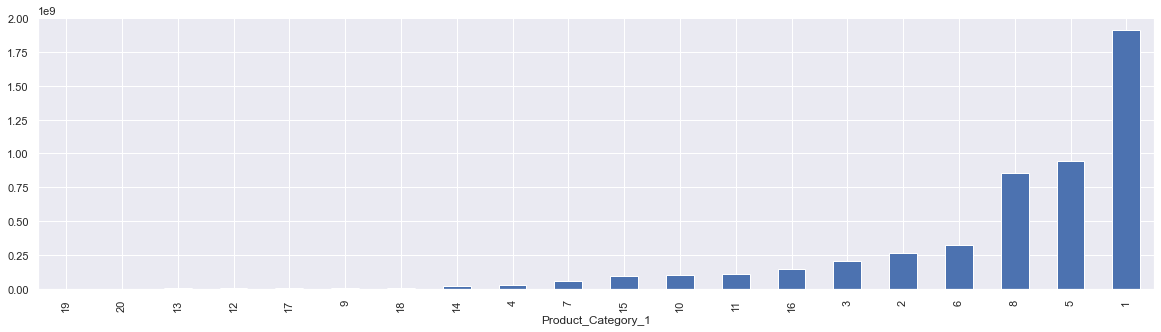

In [83]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Product_Category_1'>

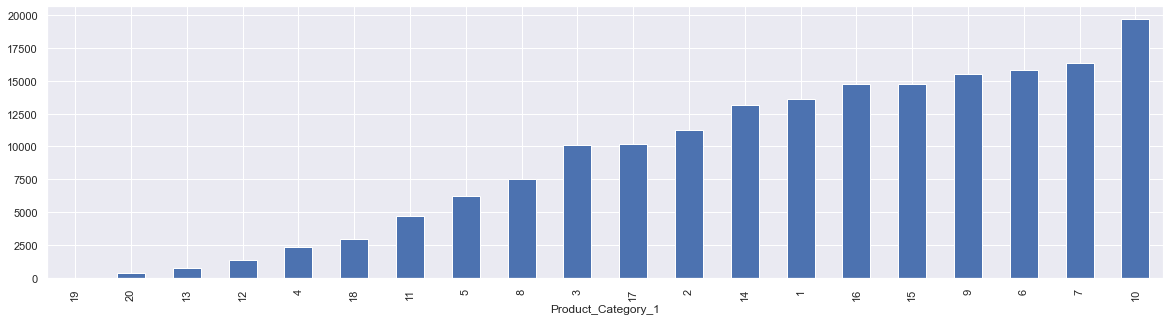

In [84]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

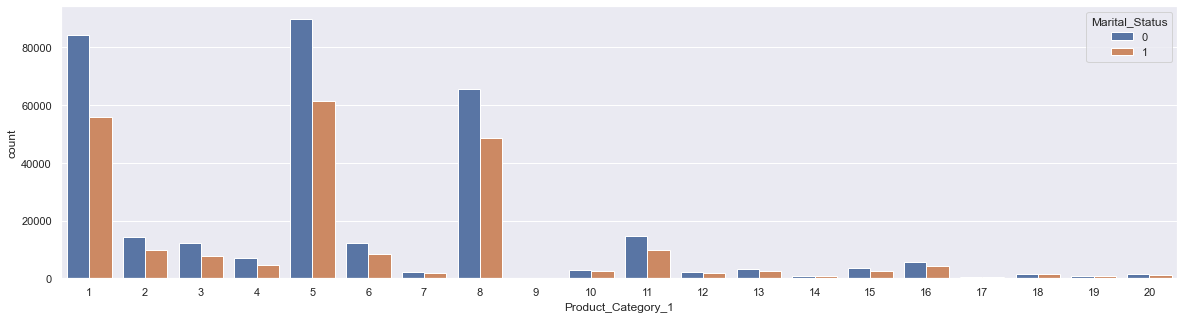

In [85]:
sns.countplot(x="Product_Category_1",hue="Marital_Status",data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

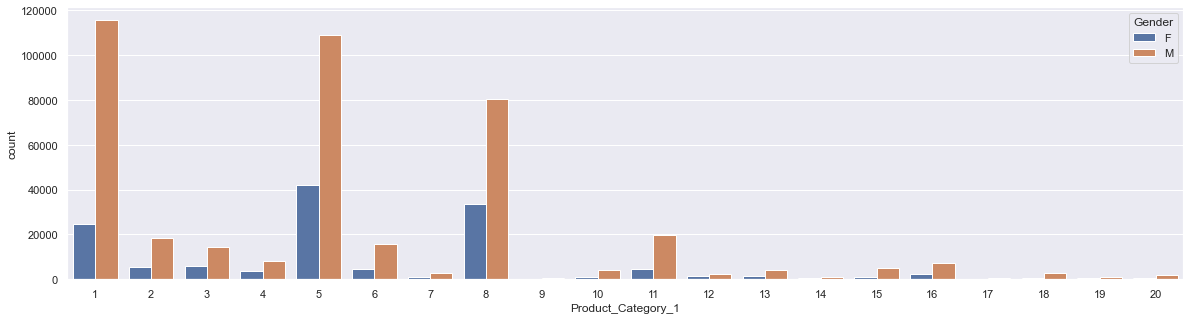

In [86]:
sns.countplot(x="Product_Category_1",hue="Gender",data=df)

# Combining Gender and Marital Status :

analyzing male- married
males- Bachelours
andvice versa in females

In [7]:
p=[]
for i in range(len(df)):
    p.append(df["Gender"][i]+"-"+str(df["Marital_Status"][i]))
df["Marital_gender"]=p
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F-0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F-0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F-0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F-0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M-0


<AxesSubplot:xlabel='Marital_gender', ylabel='count'>

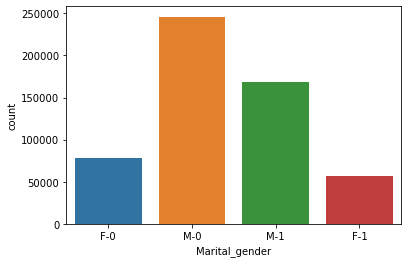

In [8]:
sns.countplot(x=df["Marital_gender"])

<AxesSubplot:xlabel='Marital_gender', ylabel='count'>

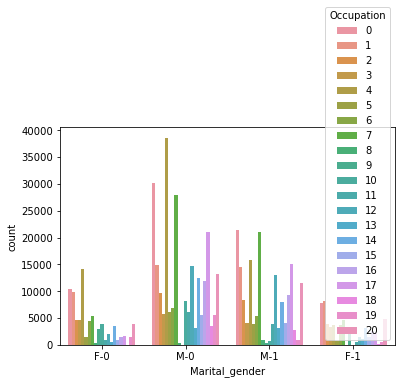

In [9]:
sns.countplot(x="Marital_gender",hue="Occupation",data=df)

<AxesSubplot:xlabel='Marital_gender', ylabel='count'>

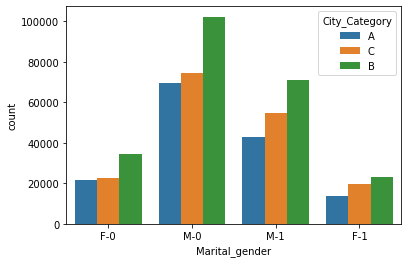

In [10]:
sns.countplot(x="Marital_gender",hue="City_Category",data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

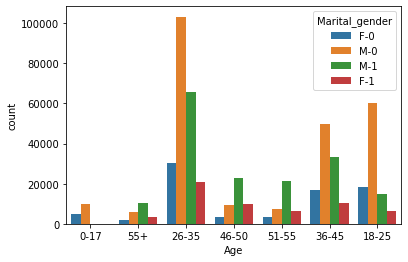

In [11]:
sns.countplot(x="Age",hue="Marital_gender",data=df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

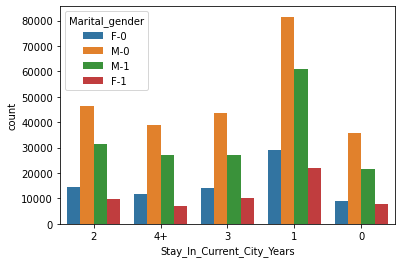

In [12]:
sns.countplot(x="Stay_In_Current_City_Years",hue="Marital_gender",data=df)